<!-- @q -->
## Problem 1 

Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [3]:
import pandas as pd

In [4]:
# Your code here
taxi = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
target_columns = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

summary_statistics = taxi[target_columns].describe()

summary_statistics

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


<!-- @q -->
## Problem 2

Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [5]:
# Your code here
longest_trip_index = taxi['trip_distance'].idxmax()

longest_trip = taxi.loc[longest_trip_index, ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]

longest_trip

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

<!-- @q -->
## Problem 3 

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [11]:
# Your code here
meteor = pd.read_csv("data/Meteorite_Landings.csv")
meteor_cleaned = (meteor.rename(columns={'mass (g)': 'mass'})       
                .drop(columns=['reclat', 'reclong'])        
                .sort_values(by='mass', ascending=False))   

meteor_cleaned.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"


<!-- @q -->
## Problem 4

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

In [12]:
# Your code here
meteor['year'] = meteor['year'].str.slice(6, 10)

meteor['year'] = pd.to_numeric(meteor['year'])

meteor['observed_early'] = meteor['year'] < 1970

meteor = meteor.set_index('id').sort_index()

result = meteor.loc[10036:10040]

result

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,observed_early
id,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,31.33333,-82.31667,"(31.33333, -82.31667)",True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,39.86667,-83.95000,"(39.86667, -83.95)",True
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,30.30000,109.50000,"(30.3, 109.5)",False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",True


**BONUS**: There's a data entry error in the `year` column. Can you find it?

In [ ]:
# Your code here


In [ ]:
# Your code here


<!-- @q -->
## Problem 5

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [13]:
# Your code here
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])

top_hours = (taxi.set_index('tpep_dropoff_datetime')
             [['trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']]
             .resample('H')
             .sum()
             .nlargest(5, 'tip_amount'))

top_hours

/tmp/ipykernel_8654/352111658.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H')


,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


<!-- @q -->
## Problem 6

Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

<Axes: title={'center': 'Traveler Throughput by Year'}, ylabel='Number of Travelers'>

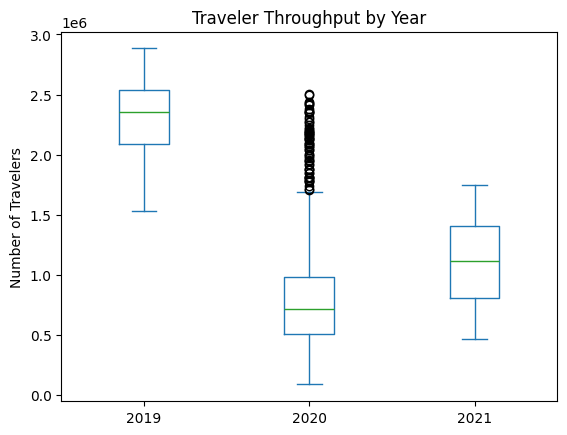

In [19]:
# Your code here
import matplotlib

tsa = pd.read_csv("data/tsa_melted_holiday_travel.csv")

tsa_pivoted = tsa.pivot(columns='year', values='travelers')

tsa_pivoted.plot(kind='box', title='Traveler Throughput by Year', ylabel='Number of Travelers')

<!-- @q -->
## Problem 7
Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

/tmp/ipykernel_8654/4171358604.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = tsa_2019.pivot_table(index='month', columns='day_of_week', values='travelers', aggfunc='median')


NameError: name 'plt' is not defined

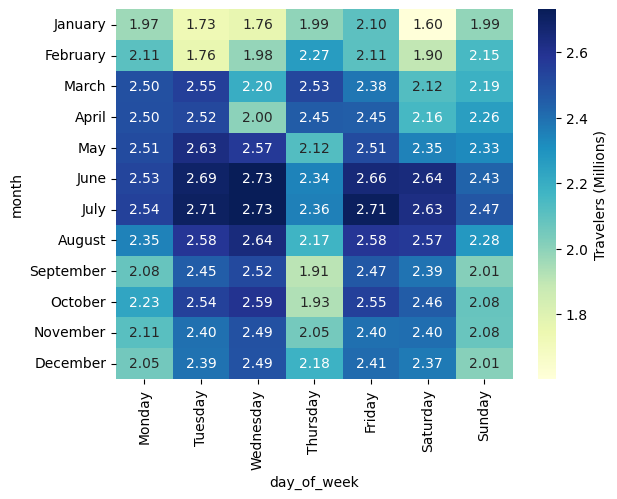

In [22]:
# Your code here
import seaborn as sns

tsa['date'] = pd.to_datetime(tsa['date'])

tsa_2019 = tsa[tsa['year'] == 2019].copy()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

tsa_2019['month'] = pd.Categorical(tsa_2019['date'].dt.month_name(), categories=month_order, ordered=True)
tsa_2019['day_of_week'] = pd.Categorical(tsa_2019['date'].dt.day_name(), categories=day_order, ordered=True)

heatmap_data = tsa_2019.pivot_table(index='month', columns='day_of_week', values='travelers', aggfunc='median')

# Divide by 1,000,000 to make the numbers readable (e.g., 2.4M instead of 2400000)
heatmap_data_millions = heatmap_data / 1_000_000

sns.heatmap(heatmap_data_millions, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Travelers (Millions)'})

plt.title('2019 TSA Median Traveler Throughput (in Millions)')